# k-Means Clustering

In [1]:
#import all relevant libraries here.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## k-Means at a glance

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

# Star Wars Galaxy

/opt/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


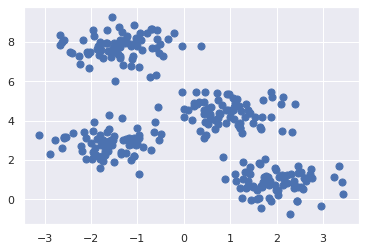

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [9]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

# Your code
Use  the cells below to implement Kmeans from scratch. Break down the entire problem into smaller subsets. For example, **using pseudocode**

For example: 

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 
   
In order to practice the concepts taught in the lecture by Antonio... **Try to implement it using a class**!

*Tip: Common Kmeans intialization problems have to do with the seed. Try to initiate it several times!*

In [27]:
style.use('ggplot')

class K_Means:
	def __init__(self, k =2, tolerance = 0.01, max_iterations = 500, k_plus=False):
		self.k = k
		self.tolerance = tolerance
		self.max_iterations = max_iterations
		self.k_plus = k_plus

	def fit(self, data):
		self.centroids = {}
		candidates = []
		# todo add the kmeans++ option when k_plus == true where centriods equaly spaced 

		#draw random samples of 'k' elements from the dataset, use them to initialize the centroids
		sample = data[(np.random.choice(data.shape[0], self.k, replace=False))]
		for i in range(self.k):
			self.centroids[i] = sample[i]
			
		#begin iterations
		for i in range(self.max_iterations):
			self.classes = {}
			for i in range(self.k):
				self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
			for features in data:
				distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				classification = distances.index(min(distances))
				self.classes[classification].append(features)

			previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
			for classification in self.classes:
				self.centroids[classification] = np.average(self.classes[classification], axis = 0)

			isOptimal = False
			#sse = np.sum([(xi - np.average(centroids))**2 for xi in centroid])
			#if sse < sse_threshold:
			#	isOptimal = True

			for centroid in self.centroids:
				original_centroid = previous[centroid]
				curr = self.centroids[centroid]

			if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
				isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
			if isOptimal:
				candidates.append(self.centroids)
				break

		##sse_table = [np.sum([(xi - np.average(c))**2 for xi in c]) for c in candidates]
		##self.centroids = candidates[sse_table.index(min(sse_table))]

		# I think we should set the cluster_centers_ property here 
        # covering from dictionary to array
    	# self.cluster_centers_ = list(dict.items(centroids))			

	def predict(self,data):
		clas = []
		for d in data: 
			for cl in self.classes.keys():
				for x in self.classes[cl]:
					if (d == x).all():
						clas.append(cl)
		return clas



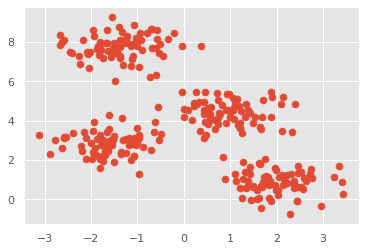

In [30]:
scr = K_Means(4)
scr.fit(X)
x = scr.predict(X)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')

# Ideal Result
You should be able to obtain similar results as the K-means algorithm for the SkLearn library. 
- Compare how well you classify! 
- Justify why you pick X clusters, since you technically shouldn´t know the answer. 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2], d

In [ ]:
# our code 
scr = K_Means(4)
scr.fit(X)
x = scr.predict(X)

3

Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

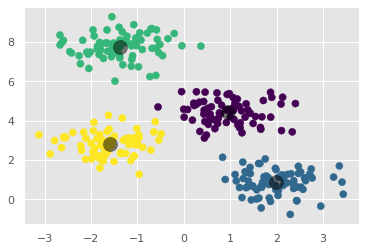

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

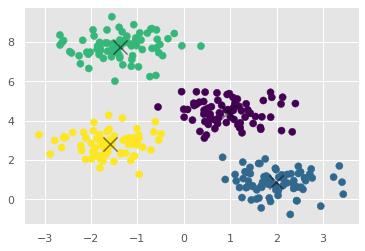

In [34]:
colors = 10*["r", "g", "c", "b", "k"]
scr = K_Means(4)
scr.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=scr.predict(X), s=50, cmap='viridis')
for centroid in scr.centroids:
	plt.scatter(scr.centroids[centroid][0], scr.centroids[centroid][1],  marker = "x", c='black', s=200, alpha=0.5)
plt.show()

# BONUS Dataset: Tatooine Map
Now, time to do it for **any dimension of n_features** of X

In [ ]:
# Generate sample data with 5 features
n_samples = 4000
n_components = 4
n_features = 5

X, y_true = make_blobs(n_samples=n_samples,
                       n_features = n_features,
                       centers=n_components,
                       cluster_std=0.60,
                       random_state=0)
X = X[:, ::-1]

df= pd.DataFrame(X)
df

,0,1,2,3,4
0,-1.506390,-0.057663,1.643606,4.426560,0.564538
1,-9.304401,7.410423,2.634051,1.421497,6.529532
2,-2.874097,2.395984,1.424139,3.999277,0.486795
3,-1.747953,0.712163,0.784197,4.408828,0.959651
4,-1.409234,8.909214,7.602814,-0.969191,2.647356
...,...,...,...,...,...
3995,-3.124214,9.833733,7.872693,-1.033497,2.852330
3996,-3.138745,9.688679,7.624227,-1.525713,3.853165
3997,-1.284945,0.625381,1.833122,4.583487,0.905785
3998,-2.542347,-0.165675,2.671166,5.036737,0.871050


# Your Code
- You can do it with Kmeans right away but...
- Can you also implement K-means ++?
- What about PCA + Kmeans?

Compute the execution time for each! 
- Which is faster? 
- Which is more accurate?

In [ ]:
km_plus = KMeans(n_clusters=4,init='k-means++',)
km_plus.fit(X) 
y_plus_means = km_plus.predict(X)

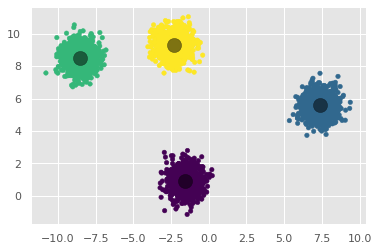

In [ ]:
#K Means ++ 
plt.scatter(X[:, 0], X[:, 1], c=y_plus_means, s=20, cmap='viridis')

centers = km_plus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

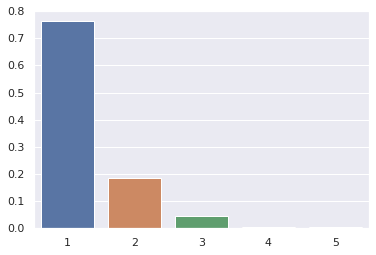

In [ ]:
#Kmeans plus PCA 
pca = PCA()
pca.fit(X)
len(pca.explained_variance_ratio_)
sns.barplot(x=[1,2,3,4,5], y =pca.explained_variance_ratio_)
plt.show()

In [ ]:
pca2= PCA(n_components=2)
pca_X = pca2.fit_transform(X)
km_plus.fit(pca_X) 
y_plus_pca = km_plus.predict(pca_X)

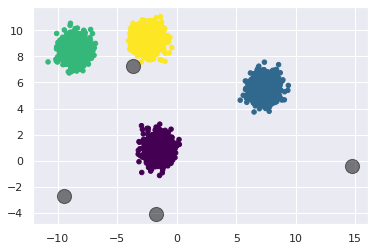

In [ ]:
#K Means ++ PCA
plt.scatter(X[:, 0], X[:, 1], c=y_plus_pca, s=20, cmap='viridis')

centers = km_plus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Ideal Result

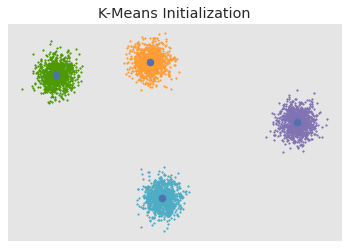

In [ ]:
# Calculate seeds from kmeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

cluster_data = kmeans.cluster_centers_
centers_init = kmeans.cluster_centers_
# Plot init seeds along side sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    # note that this is a plot only in two dimensions
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means Initialization")
plt.xticks([])
plt.yticks([])
plt.show()